# 1.NAG优化方法

best acc is 0.852405


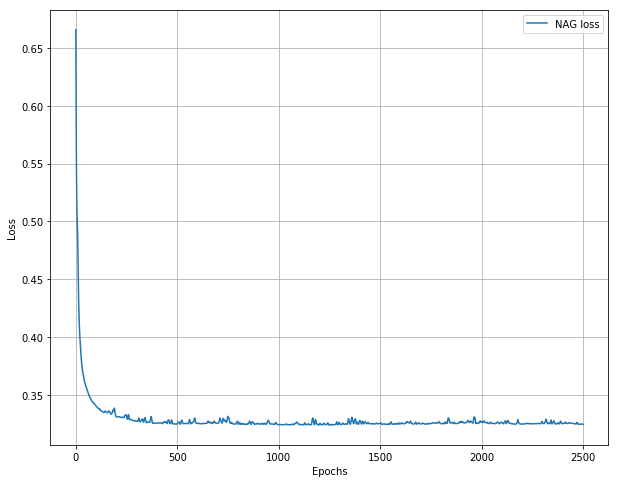

In [118]:
%matplotlib inline
from sklearn import datasets as ds  
from sklearn.model_selection import train_test_split
import math 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#load the file  
x_train,y_train = ds.load_svmlight_file("/Users/humeng/Desktop/a9a.txt")  
x_validation,y_validation = ds.load_svmlight_file("/Users/humeng/Desktop/a9a.t")

# Add bias
x_train = np.hstack((x_train.toarray(), np.ones((y_train.shape[0], 1))))
x_validation = np.hstack((x_validation.toarray(), np.zeros(
    (x_validation.shape[0], max(x_train.shape[1] - 1, x_validation.shape[1]) - x_validation.shape[1]))))
x_validation = np.hstack((x_validation ,np.ones((x_validation.shape[0],1))))

#change data format
y_validation = y_validation.reshape(-1,1)
y_train = y_train.reshape(-1,1)

#parameter initialization
batch_size = 100
learning_rate = 0.05
epochs =2500
gamma = 0.9   
threshold = 0.0
best_acc = 0.0
w = np.zeros((x_train.shape[1],1))
v = np.zeros((x_train.shape[1],1))
l_NAG = []

#sigmoid function
def sigmoid(n):
    return 1.0 / (1 + np.exp(-n))

def gradient(w,x,y):
    h = sigmoid(y * np.dot(x, w))
    grad = -np.sum(np.multiply(1 - h, y * x), axis = 0).T / x.shape[0]
    return grad.reshape(-1, 1)

def loss(w,x,y):
    h2 = sigmoid(np.multiply(y, np.dot(x, w)))
    l = -np.sum(np.log(h2)) / x.shape[0]
    return l

for i in range(epochs):
    # Choose batch samples randomly
    batch_sample = np.random.choice(x_train.shape[0], batch_size)
    batch_x = x_train[batch_sample]
    batch_y = y_train[batch_sample]
    #update parameters
    v = gamma * v + learning_rate * gradient(w - gamma * v ,batch_x ,batch_y)
    w = w - v
    # mark the sample with predict scores
    y_pred = np.ones((y_validation.shape[0],1))
    for j in range (x_validation.shape[0]):
        score = np.dot(x_validation[j,:],w)
        if score < threshold :
            y_pred[j] = -1
    acc = np.mean(y_pred == y_validation)
    if acc > best_acc:
        best_acc = acc
    l_NAG.append(loss(w,x_validation,y_validation))
    
print('best acc is %f' %best_acc)
    
    
#print the figure
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(np.arange(epochs),l_NAG,label='NAG loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()

plt.show()







# 2.RMSProp优化方法

best acc is 0.852159


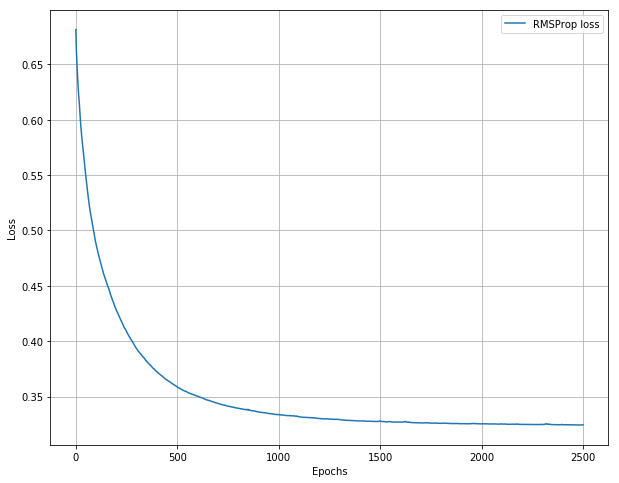

In [119]:
%matplotlib inline
from sklearn import datasets as ds  
from sklearn.model_selection import train_test_split
import math 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#load the file  
x_train,y_train = ds.load_svmlight_file("/Users/humeng/Desktop/a9a.txt")  
x_validation,y_validation = ds.load_svmlight_file("/Users/humeng/Desktop/a9a.t")

# Add bias
x_train = np.hstack((x_train.toarray(), np.ones((y_train.shape[0], 1))))
x_validation = np.hstack((x_validation.toarray(), np.zeros(
    (x_validation.shape[0], max(x_train.shape[1] - 1, x_validation.shape[1]) - x_validation.shape[1]))))
x_validation = np.hstack((x_validation,np.ones((x_validation.shape[0],1))))

#change data format
y_validation = y_validation.reshape(-1,1)
y_train = y_train.reshape(-1,1)

#parameter initialization
best_acc = 0.0
batch_size = 100
learning_rate = 0.001
epochs = 2500
gamma = 0.9   
epsilon = 1e-8
threshold = 0.0
w = np.zeros((x_train.shape[1],1))
G = np.zeros((x_train.shape[1],1))
l_RMSProp = []

#sigmoid function
def sigmoid(n):
    return 1.0 / (1 + np.exp(-n))

def gradient(w,x,y):
    h = sigmoid(y * np.dot(x, w))
    grad = -np.sum(np.multiply(1 - h, y * x), axis = 0).T / x.shape[0]
    return grad.reshape(-1, 1)

def loss(w,x,y):
    h2 = sigmoid(np.multiply(y, np.dot(x, w)))
    l = -np.sum(np.log(h2)) / x.shape[0]
    return l

for i in range(epochs):
    # Choose batch samples randomly
    batch_sample = np.random.choice(x_train.shape[0], batch_size)
    batch_x = x_train[batch_sample]
    batch_y = y_train[batch_sample]
    #update parameters
    g = gradient(w ,batch_x ,batch_y)
    G = gamma * G + (1 - gamma) * (g**2)
    w = w - learning_rate * g / np.sqrt(G + epsilon) 
    # mark the sample with predict scores
    y_pred = np.ones((y_validation.shape[0],1))
    for j in range (x_validation.shape[0]):
        score = np.dot(x_validation[j,:],w)
        if score < threshold :
            y_pred[j] = -1
    acc = np.mean(y_pred == y_validation)
    if acc > best_acc:
        best_acc = acc
    l_RMSProp.append(loss(w,x_validation,y_validation))
    
print('best acc is %f' %best_acc)
    
#print the figure
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(np.arange(epochs),l_RMSProp,label='RMSProp loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()

plt.show()








# 3.AdaDelta优化方法

best acc is 0.852466


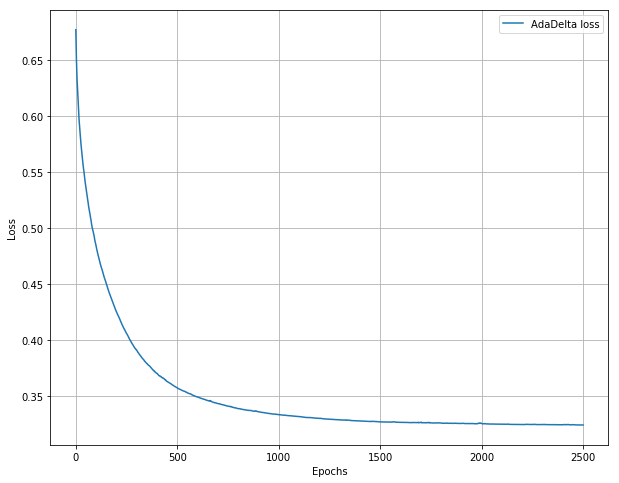

In [120]:
%matplotlib inline
from sklearn import datasets as ds  
from sklearn.model_selection import train_test_split
import math 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#load the file  
x_train,y_train = ds.load_svmlight_file("/Users/humeng/Desktop/a9a.txt")  
x_validation,y_validation = ds.load_svmlight_file("/Users/humeng/Desktop/a9a.t")

# Add bias
x_train = np.hstack((x_train.toarray(), np.ones((y_train.shape[0], 1))))
x_validation = np.hstack((x_validation.toarray(), np.zeros(
    (x_validation.shape[0], max(x_train.shape[1] - 1, x_validation.shape[1]) - x_validation.shape[1]))))
x_validation = np.hstack((x_validation,np.ones((x_validation.shape[0],1))))

#change data format
y_validation = y_validation.reshape(-1,1)
y_train = y_train.reshape(-1,1)

#parameter initialization
best_acc = 0.0
batch_size = 100
epochs = 2500
gamma = 0.95   
epsilon = 1e-6
threshold = 0.0
dw = np.zeros((x_train.shape[1],1))
w = np.zeros((x_train.shape[1],1))
G = np.zeros((x_train.shape[1],1))
l_AdaDelta = []

#sigmoid function
def sigmoid(n):
    return 1.0 / (1 + np.exp(-n))

def gradient(w,x,y):
    h = sigmoid(y * np.dot(x, w))
    grad = -np.sum(np.multiply(1 - h, y * x), axis = 0).T / x.shape[0]
    return grad.reshape(-1, 1)

def loss(w,x,y):
    h2 = sigmoid(np.multiply(y, np.dot(x, w)))
    l = -np.sum(np.log(h2)) / x.shape[0]
    return l

for i in range(epochs):
    # Choose batch samples randomly
    batch_sample = np.random.choice(x_train.shape[0], batch_size)
    batch_x = x_train[batch_sample]
    batch_y = y_train[batch_sample]
    #update parameters
    g = gradient(w ,batch_x ,batch_y)
    G = gamma * G + (1 - gamma) * (g**2)
    a = np.sqrt(dw + epsilon) * g / np.sqrt(G + epsilon)
    w = w - a
    dw = gamma * dw + (1 - gamma) * (dw**2)
    # mark the sample with predict scores
    y_pred = np.ones((y_validation.shape[0],1))
    for j in range (x_validation.shape[0]):
        score = np.dot(x_validation[j,:],w)
        if score < threshold :
            y_pred[j] = -1
    acc = np.mean(y_pred == y_validation)
    if acc > best_acc:
        best_acc = acc
    l_AdaDelta.append(loss(w,x_validation,y_validation))
    
print('best acc is %f' %best_acc)
    
#print the figure
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(np.arange(epochs),l_AdaDelta,label='AdaDelta loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()

plt.show()









# 4.Adam优化方法

best acc is 0.851852


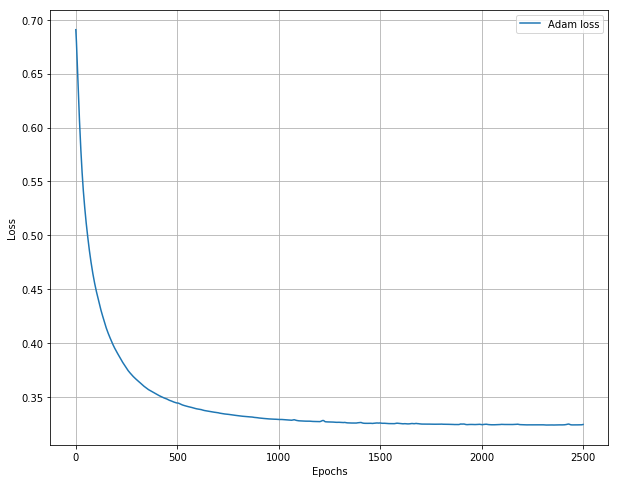

In [121]:
%matplotlib inline
from sklearn import datasets as ds  
from sklearn.model_selection import train_test_split
import math 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#load the file
x_train,y_train = ds.load_svmlight_file("/Users/humeng/Desktop/a9a.txt") 
x_validation,y_validation = ds.load_svmlight_file("/Users/humeng/Desktop/a9a.t")

# Add bias
x_train = np.hstack((x_train.toarray(), np.ones((y_train.shape[0], 1))))
x_validation = np.hstack((x_validation.toarray(), np.zeros(
    (x_validation.shape[0], max(x_train.shape[1] - 1, x_validation.shape[1]) - x_validation.shape[1]))))
x_validation = np.hstack((x_validation,np.ones((x_validation.shape[0],1))))

#change data format
y_validation = y_validation.reshape(-1,1)
y_train = y_train.reshape(-1,1)

#parameter initialization
best_acc = 0.0
batch_size = 100
t = 1
learning_rate = 0.002
epochs = 2500
gamma = 0.999  
beta = 0.9
epsilon = 1e-8
threshold = 0.0
m = np.zeros((x_train.shape[1],1))
w = np.zeros((x_train.shape[1],1))
G = np.zeros((x_train.shape[1],1))
l_Adam = []

#sigmoid function
def sigmoid(n):
    return 1.0 / (1 + np.exp(-n))

def gradient(w,x,y):
    h = sigmoid(y * np.dot(x, w))
    grad = -np.sum(np.multiply(1 - h, y * x), axis = 0).T / x.shape[0]
    return grad.reshape(-1, 1)

def loss(w,x,y):
    h2 = sigmoid(np.multiply(y, np.dot(x, w)))
    l = -np.sum(np.log(h2)) / x.shape[0]
    return l

for i in range(epochs):
    # Choose batch samples randomly
    batch_sample = np.random.choice(x_train.shape[0], batch_size)
    batch_x = x_train[batch_sample]
    batch_y = y_train[batch_sample]
    #update parameters 
    g = gradient(w ,batch_x ,batch_y)
    m = beta * m + (1- beta) * g
    G = gamma * G + (1 - gamma) * (g**2)
    a = learning_rate * np.sqrt(1 - gamma**t) / np.sqrt(1 - beta**t)
    w = w - a * m / np.sqrt(G + epsilon)
    t += 1
    # mark the sample with predict scores
    y_pred = np.ones((y_validation.shape[0],1))
    for j in range (x_validation.shape[0]):
        score = np.dot(x_validation[j,:],w)
        if score < threshold :
            y_pred[j] = -1
    acc = np.mean(y_pred == y_validation)
    if acc > best_acc:
        best_acc = acc
    l_Adam.append(loss(w,x_validation,y_validation))
    
print('best acc is %f' %best_acc)
    
#print the figure
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(np.arange(epochs),l_Adam,label='Adam loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()

plt.show()










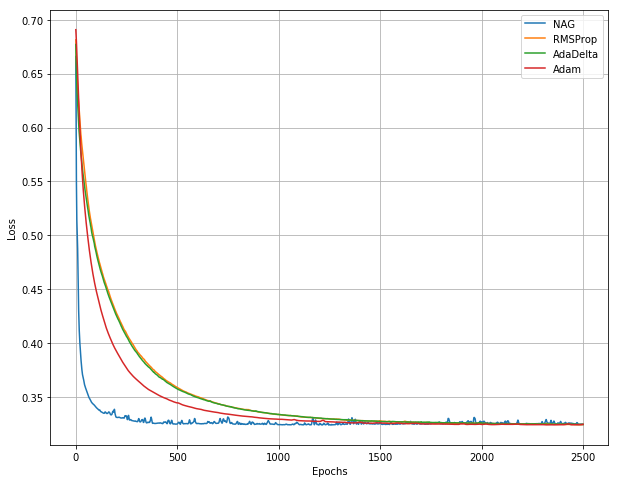

In [122]:
# print all loss of 4 methods
plt.plot(l_NAG, label='NAG')
plt.plot(l_RMSProp, label='RMSProp')
plt.plot(l_AdaDelta, label='AdaDelta')
plt.plot(l_Adam, label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid()
plt.show()